In [9]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline

# change size of plot
pl.rcParams['figure.figsize'] = (8.0, 6.0)

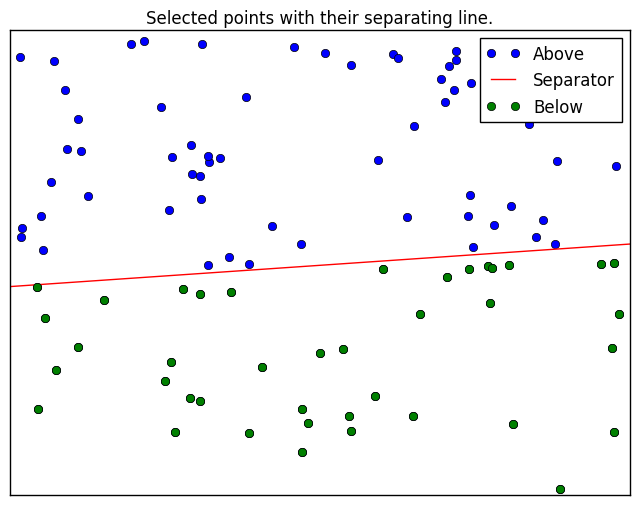

In [2]:
# Generate our training points
N = 100
# create array with N units, size of 3 numbers each
xn = nr.rand(N,3)
# change all the first column to 1's, this will be our bias
for n in xn:
    n[0]=1    

#create an array with evenly spaced numbers between 0 & 1, default is 50
x = np.linspace(0,1);

# Pick a line 
a = nr.rand();
b = nr.rand();
# anonymous function, passing in argument as x
#equation for a line
f = lambda x : a*x + b;

# plot all the points in xn with blue circles (bo)
pl.plot(xn[:,1], xn[:,2],'bo');

# now draw the line based on our evenly spaced x coords, and our lamda which gives us y based on x
# make the line red (r)
pl.plot(x,f(x),'r')

# Linearly separate the points by the line

# get a bunch of zeros just as place holders, we are eventually looking for 1's or -1's
# these will be our training labels, either -1 or +1
yn = np.zeros([N,1]);

# xrange will give us numbers as we need them, instead of creating a whole new list in the specified range
for i in xrange(N):
    # if the y coord of our line equation, given the x value from our array (f(xn[i,0]))
    # is higher than our actual y coord (xn[i,1]), then the point is below the line
    if(f(xn[i,1])>xn[i,2]):
        # Point is below line
        yn[i] = 1;
        # draw green circle for below the line
        pl.plot(xn[i,1],xn[i,2],'go')
    else:
        # Point is above line
        yn[i] = -1;
        
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
# Get Current Axes
figa = pl.gca();
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)


In [7]:
class Perceptron:
    
    def __init__(self):
        # initialize weights (2 inputs, and 1 bias)
        self.w = np.zeros(3);
        # learning constant
        self.lr = 0.01;
    
    def train(self, data, labels, MaxIter=3000):
        N = data.shape[0];
        for _ in xrange(MaxIter):
            i = nr.randint(N);
            # dot product then get the sign, all in one line
            # wraps up our two functions, feedforward and activate, 
            guess = np.sign( np.dot(self.w, data[i,:]) );
            error = labels[i][0] - guess;
            for j, weight in enumerate(self.w):
                # i is which row of data, j is which column
                self.w[j] += error * self.lr * data[i,j];
    
    def query(self, coords):
        result = np.sign(np.dot(self.w, coords));
        if result == 1:
            print("Point is below line")
        if result == -1:
            print("Point is above line")
            

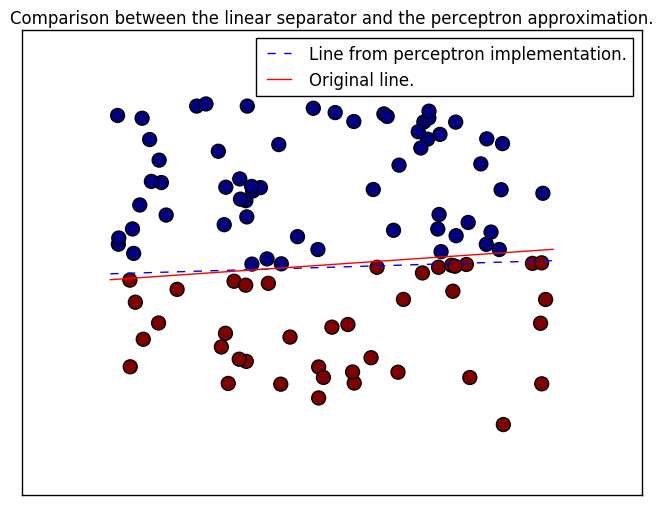

In [8]:
p = Perceptron();
p.train(xn,yn)
w = p.w

# Using weights w to compute a,b for a line y=a*x+b

# base equation is w[0] + w[1]*x + w[2]*y = 0

bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

# Computing the colors for the points
sep_color = yn;

figa = pl.gca()

pl.scatter(xn[:,1],xn[:,2],c=sep_color, s=100)
pl.plot(x,y(x),'b--',label='Line from perceptron implementation.')
pl.plot(x,f(x),'r',label='Original line.')
pl.legend()
pl.title('Comparison between the linear separator and the perceptron approximation.')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)



[ 0.01836284  0.90454296]
Point is above line


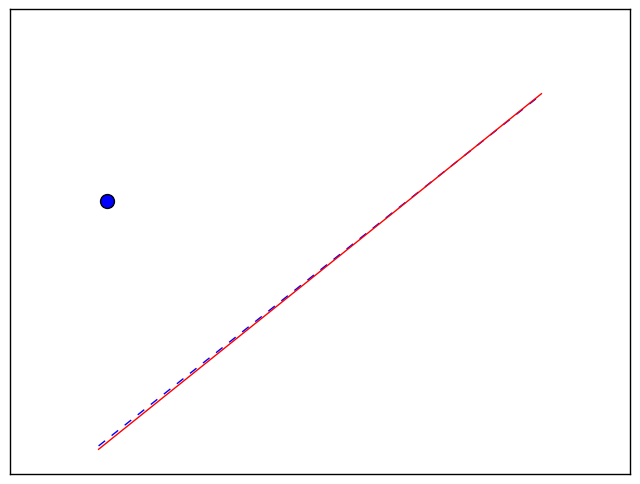

In [67]:
# Now let's query and see

testpoint = nr.rand(1,2)
print(testpoint[0])
p.query(testpoint[0])

pl.scatter(testpoint[:,0],testpoint[:,1],s=100)
pl.plot(x,y(x),'b--')
pl.plot(x,f(x),'r',label='Original line.')

figa = pl.gca()
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)